<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Logistic Regression

This code snippet imports a set of essential Python libraries and modules commonly used for data analysis, visualization, and machine learning, specifically for logistic regression tasks.

- `import numpy as np`: Imports NumPy, a fundamental library for numerical computing in Python, often used for array operations and mathematical functions.
- `import pandas as pd`: Imports Pandas, a powerful library for data manipulation and analysis, providing DataFrame and Series data structures.
- `from matplotlib import pyplot as plt`: Imports the `pyplot` module from Matplotlib, which is used for creating static, interactive, and animated visualizations in Python.
- `from sklearn.linear_model import LogisticRegression`: Imports the `LogisticRegression` class from Scikit-learn, which is used to perform logistic regression modeling for classification tasks.
- `import statsmodels.formula.api as smf`: Imports the formula API from Statsmodels, which allows for specifying statistical models using R-style formulas, including logistic regression.
- `from sklearn.metrics import confusion_matrix`: Imports the `confusion_matrix` function from Scikit-learn, which is used to evaluate the performance of classification models by comparing predicted and actual labels.
- `from sklearn.model_selection import train_test_split`: Imports the `train_test_split` function, which is used to split datasets into training and testing subsets for model evaluation.
- `from sklearn.metrics import ConfusionMatrixDisplay`: Imports the `ConfusionMatrixDisplay` class, which provides a convenient way to visualize confusion matrices.

Together, these imports set up the environment for performing logistic regression analysis, evaluating model performance, and visualizing results in a typical data science workflow.

In [1]:
import numpy                                             as np  # type: ignore
import pandas                                            as pd  # type: ignore
from   matplotlib              import pyplot             as plt # type: ignore
from   sklearn.linear_model    import LogisticRegression        # type: ignore
import statsmodels.formula.api                           as smf # type: ignore
from   sklearn.metrics         import confusion_matrix          # type: ignore
from   sklearn.model_selection import train_test_split          # type: ignore
from   sklearn.metrics         import ConfusionMatrixDisplay    # type: ignore

## The sigmoid function
The so called [logit](https://en.wikipedia.org/wiki/Logit) function is the inverse of the [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function, which is a special case of the [logistic](https://en.wikipedia.org/wiki/Logistic_function) function. It is very common to see these terms being used interchangeably.

$$
f(x) = \frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}
$$

This code defines the sigmoid function, which is a fundamental mathematical function used in logistic regression and many other areas of machine learning and statistics. The sigmoid function takes a real-valued input `x` and transforms it into a value between 0 and 1. 

Mathematically, the function is defined as $$(sigma(x) = \frac{1}{1 + e^{-x}})$$\
 In the code, `np.exp(-x)` computes the exponential of `-x` using NumPy, and the result is used in the denominator. The output of the sigmoid function can be interpreted as a probability, making it especially useful for binary classification tasks, where the goal is to predict the likelihood that an input belongs to a particular class. 

The sigmoid function is also known for its characteristic "S"-shaped curve, which smoothly maps any input value to the (0, 1) interval. This property makes it ideal for modeling probabilities in logistic regression.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

This line of code prints the result of applying the `sigmoid` function to the input value `0`. \
The `sigmoid` function, defined as $$(sigma(x) = \frac{1}{1 + e^{-x}})$$ maps any real number to a value between 0 and 1. When the input is `0`, the calculation becomes $$(\frac{1}{1 + e^{0}} = \frac{1}{2} = 0.5)$$ \
Therefore, this statement will output `0.5` to the console. This demonstrates that the sigmoid function is centered at 0.5 when the input is zero, which is a useful property in logistic regression for interpreting probabilities.

In [3]:
print(sigmoid(0))

0.5


This code snippet visualizes the sigmoid function, which is fundamental in logistic regression and many machine learning applications.

1. `x = np.arange(-10., 10., 0.2)` creates an array of values from -10 to just under 10, spaced by 0.2. These values serve as the input range for the sigmoid function.
2. `y = sigmoid(x)` applies the sigmoid function to each value in `x`, producing an array of outputs between 0 and 1. The sigmoid function smoothly maps any real number to this interval, resulting in an "S"-shaped curve.
3. `plt.plot(x, y)` generates a line plot of the input values (`x`) against their corresponding sigmoid outputs (`y`).
4. `plt.title('Sigmoid function')` adds a title to the plot for clarity.
5. `plt.show()` displays the plot.

The resulting graph illustrates how the sigmoid function transforms input values: for large negative inputs, the output approaches 0; for large positive inputs, it approaches 1; and at 0, the output is exactly 0.5. This visualization helps to understand why the sigmoid is used to model probabilities in logistic regression.

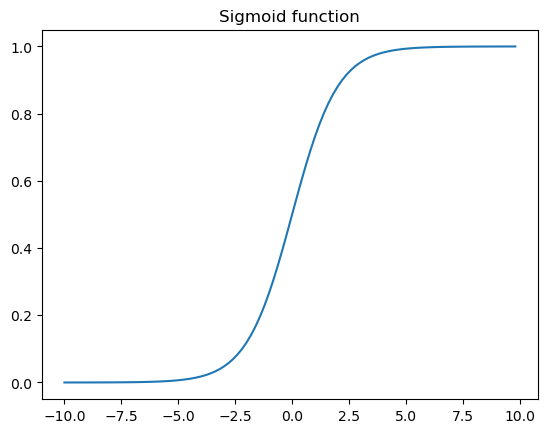

In [4]:
x = np.arange(-10., 10., 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid function')
plt.show()

## Cross-entropy

$$CE = -\frac{1}{n}\sum_{i}^{n}{y_i \log{\hat{y}_i} + (1-y_i) \log{(1-\hat{y}_i)}}$$

This code defines a function `ce` that computes the cross-entropy loss for binary classification tasks. The function takes two arguments: `y_pred`, which represents the predicted probabilities (values between 0 and 1), and `y`, which represents the true binary labels (0 or 1).

The formula inside the function, `-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)`, calculates the cross-entropy for each prediction. If the true label `y` is 1, only the first term contributes, penalizing predictions far from 1. If `y` is 0, only the second term contributes, penalizing predictions far from 0. This loss function is widely used in logistic regression and other classification algorithms because it strongly penalizes confident but incorrect predictions, encouraging the model to output probabilities that match the true labels. The function returns the element-wise cross-entropy values, which can be averaged later to get the mean loss over a dataset.

In [5]:
def ce(y_pred, y):
    return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)

This code snippet visualizes how the cross-entropy loss behaves for binary classification as a function of the predicted probability. 

First, `p = np.linspace(0.01, 0.99, 99)` creates an array of 99 evenly spaced probability values between 0.01 and 0.99. These values represent possible predicted probabilities for a binary classifier.

The next two lines plot the cross-entropy loss for two scenarios:
- `plt.plot(p, ce(p, np.zeros(len(p))))` computes and plots the cross-entropy loss when the true label is 0 for all predictions. This shows how the loss increases as the predicted probability moves away from 0.
- `plt.plot(p, ce(p, np.ones(len(p))))` computes and plots the cross-entropy loss when the true label is 1 for all predictions. This shows how the loss increases as the predicted probability moves away from 1.

The x-axis is labeled "Predicted probability" and the y-axis is labeled "Cross-entropy". The legend distinguishes between the two cases (true label 0 and true label 1), and is placed at the top center of the plot. Finally, `plt.show()` displays the plot.

This visualization helps illustrate that the cross-entropy loss penalizes confident but incorrect predictions much more heavily than less confident or correct predictions, which is why it is widely used as a loss function in logistic regression and other classification tasks.

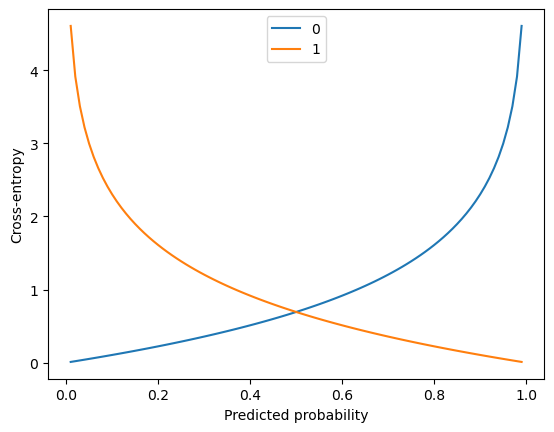

In [6]:
p = np.linspace(0.01, 0.99, 99)
plt.plot(p, ce(p, np.zeros(len(p))))
plt.plot(p, ce(p, np.ones(len(p))))
plt.xlabel('Predicted probability')
plt.ylabel('Cross-entropy')
plt.legend([0, 1], loc='upper center')
plt.show()

This code snippet reads data from an Excel file named `loans.xls` located in the data directory and loads it into a Pandas DataFrame called `df`. The function `pd.read_excel('data/loans.xls')` uses Pandas' `read_excel` method to parse the contents of the Excel file, automatically inferring the structure of the data, such as column names and data types, unless additional arguments are provided.

After loading the data, the variable `df` holds the resulting DataFrame, which organizes the data in a tabular format with labeled columns and rows. The second line, `df`, simply references the DataFrame. In an interactive environment like a Jupyter Notebook or Visual Studio Code's interactive window, this will display the contents of the DataFrame, allowing you to inspect the data that was just loaded. This is a common first step in a data analysis workflow, as it lets you verify that the data has been read correctly and gives you an overview of its structure and contents.

In [7]:
df = pd.read_excel('data/loans.xls')
df

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
...,...,...,...,...,...,...,...
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0


This code fits a logistic regression model using the `statsmodels` library to predict the probability of loan default based on the number of credit inquiries. The function `smf.logit('default ~ inquiries', data=df)` specifies a logistic regression model where `default` is the binary dependent variable (e.g., 0 for no default, 1 for default), and `inquiries` is the independent variable (the number of credit inquiries). The formula syntax `'default ~ inquiries'` is similar to R-style formulas, making it easy to specify the relationship between variables.

The `.fit()` method estimates the model parameters (intercept and coefficient for `inquiries`) using maximum likelihood estimation. The resulting `model` object contains the fitted logistic regression model.

Calling `model.summary()` displays a detailed summary of the fitted model, including the estimated coefficients, their standard errors, z-scores, p-values, and confidence intervals. It also provides model fit statistics such as pseudo R-squared and information criteria. This summary helps you interpret the effect of credit inquiries on the likelihood of default and assess the statistical significance of the predictor.

In [8]:
model = smf.logit('default ~ inquiries', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.429945
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 9516
Model:                          Logit   Df Residuals:                     9514
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 May 2025   Pseudo R-squ.:                 0.02151
Time:                        18:24:37   Log-Likelihood:                -4091.4
converged:                       True   LL-Null:                       -4181.3
Covariance Type:            nonrobust   LLR p-value:                 5.051e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9300      0.036    -53.517      0.000      -2.001      -1.859
inquiries      0.1506      0.011     13.275      0.000       0.128       0.173
==============================================================================
"""

This code fits a logistic regression model using the `statsmodels` library to predict the probability of loan default based on the number of credit inquiries. The function `smf.logit('default ~ inquiries', data=df)` specifies a logistic regression model where `default` is the binary dependent variable (e.g., 0 for no default, 1 for default), and `inquiries` is the independent variable (the number of credit inquiries). The formula syntax `'default ~ inquiries'` is similar to R-style formulas, making it easy to specify the relationship between variables.

The `.fit()` method estimates the model parameters (intercept and coefficient for `inquiries`) using maximum likelihood estimation. The resulting `model` object contains the fitted logistic regression model.

Calling `model.summary()` displays a detailed summary of the fitted model, including the estimated coefficients, their standard errors, z-scores, p-values, and confidence intervals. It also provides model fit statistics such as pseudo R-squared and information criteria. This summary helps you interpret the effect of credit inquiries on the likelihood of default and assess the statistical significance of the predictor.

In [9]:
pred = model.predict(df)
pred

0       0.126753
1       0.126753
2       0.144385
3       0.144385
4       0.126753
          ...   
9511    0.164009
9512    0.235631
9513    0.326322
9514    0.235631
9515    0.263833
Length: 9516, dtype: float64

This code defines and uses a custom prediction function for a logistic regression model. The `predict` function takes two arguments: `coef`, which represents the coefficient for the predictor variable (in this case, the number of credit inquiries), and `x`, which is the input data (such as a column from a DataFrame).

Inside the function, it calculates the linear combination of the model's intercept (`model.params['Intercept']`) and the product of the coefficient and the input values (`coef * x`). This linear combination represents the log-odds in logistic regression. The result is then passed to the `sigmoid` function, which transforms the log-odds into probabilities between 0 and 1.

The second line calls `predict` using the fitted coefficient for `inquiries` (`model.params['inquiries']`) and the actual `inquiries` data from the DataFrame. This produces the predicted probabilities that each observation in the dataset will default, based on the number of credit inquiries. This approach helps illustrate how logistic regression uses the learned parameters to make probability predictions for new or existing data.

In [10]:
def predict(coef, x):
    return sigmoid(model.params['Intercept'] + coef * x)
predict(model.params['inquiries'], df['inquiries'])

0       0.126753
1       0.126753
2       0.144385
3       0.144385
4       0.126753
          ...   
9511    0.164009
9512    0.235631
9513    0.326322
9514    0.235631
9515    0.263833
Name: inquiries, Length: 9516, dtype: float64

This code defines a function `ce` that calculates the cross-entropy loss for binary classification tasks. The function takes two arguments: `y_pred`, which contains the predicted probabilities (values between 0 and 1), and `y`, which contains the true binary labels (0 or 1).

Inside the function, the expression `y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)` computes the log-likelihood for each prediction. For each data point, if the true label `y` is 1, only the first term contributes, rewarding predictions close to 1. If `y` is 0, only the second term contributes, rewarding predictions close to 0. The negative mean of these values, taken with `-np.mean(...)`, gives the average cross-entropy loss across all predictions. This loss function penalizes confident but incorrect predictions more heavily, making it a standard choice for evaluating models in logistic regression.

The second line, `ce(pred, df['default'])`, calls this function using the predicted probabilities (`pred`) and the actual labels (`df['default']`), returning the average cross-entropy loss for the dataset. This value provides a quantitative measure of how well the model's predicted probabilities match the true outcomes.

In [11]:
def ce(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
print('Cross-Entropy:', ce(pred, df['default']))

Cross-Entropy: 0.4299445005163216


This code snippet explores how the cross-entropy loss changes as the coefficient in a logistic regression model varies. 

First, `coefs = np.linspace(-1, 1, 100)` creates an array of 100 evenly spaced values between -1 and 1. These values represent different possible coefficients for the predictor variable (such as the number of credit inquiries).

An empty list `cost` is initialized to store the cross-entropy loss for each coefficient. The `for` loop iterates over each coefficient value `c` in `coefs`. For each value, it uses the `predict` function to calculate predicted probabilities based on the current coefficient and the actual data (`df['inquiries']`). Then, it computes the cross-entropy loss between these predictions and the true labels (`df['default']`) using the `ce` function, appending the result to the `cost` list.

After the loop, `plt.plot(coefs, cost)` creates a line plot showing how the cross-entropy loss varies with the coefficient. The x-axis is labeled "Coefficient" and the y-axis is labeled "Cost (Cross-entropy)". The code is missing the final `plt.show()` call (it is cut off as `plt.sh`), which would display the plot.

This visualization helps illustrate how the choice of coefficient affects the model's fit to the data, with the minimum point on the curve indicating the coefficient that yields the lowest cross-entropy loss. This is closely related to the process of parameter optimization in logistic regression.

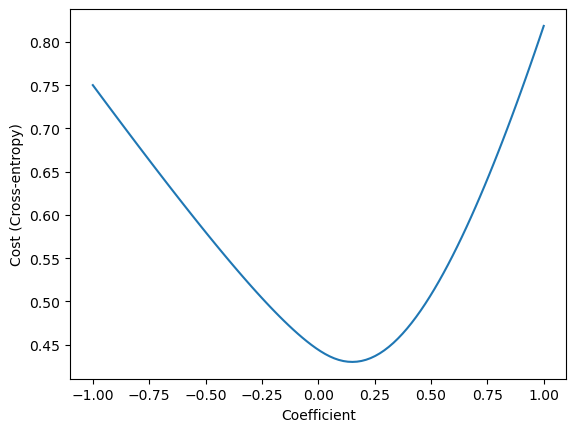

In [12]:
coefs = np.linspace(-1, 1, 100)
cost  = []
for c in coefs:
    pred = predict(c, df['inquiries'])
    cost.append(ce(pred, df['default']))
plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (Cross-entropy)')
plt.show()

## Confusion matrix
This code demonstrates how to train and evaluate a logistic regression model using scikit-learn. 

First, `X = df.drop(columns='default')` creates a new DataFrame `X` by removing the `'default'` column from `df`. This means `X` contains all the predictor variables (features) except the target variable. The next line, `y = df['default']`, extracts the `'default'` column as the target variable, which typically contains binary values indicating whether a loan defaulted.

The line `model = LogisticRegression(solver='liblinear').fit(X, y)` initializes a logistic regression model using the `'liblinear'` solver (which is suitable for small datasets and binary classification) and fits it to the data (`X` and `y`). This trains the model to learn the relationship between the features and the target.

Finally, `ce(model.predict_proba(X)[:, 1], y)` evaluates the model's performance using the cross-entropy loss function `ce`. The method `model.predict_proba(X)` returns the predicted probabilities for each class; `[:, 1]` selects the probability of the positive class (e.g., default = 1) for each sample. The `ce` function then computes the average cross-entropy loss between these predicted probabilities and the true labels `y`, providing a measure of how well the model's predicted probabilities match the actual outcomes. Lower cross-entropy values indicate better model performance.

In [13]:
X     = df.drop(columns='default')
y     = df['default']
model = LogisticRegression(solver='liblinear').fit(X, y)
print('Cross-Entropy:', ce(model.predict_proba(X)[:, 1], y))

Cross-Entropy: 0.4220381348751902


This code prints the predicted probabilities for each class generated by the trained logistic regression model on the dataset `X`. The function `model.predict_proba(X)` returns a NumPy array where each row corresponds to a sample in `X`, and each column represents the probability that the sample belongs to a particular class (for binary classification, typically columns for class 0 and class 1).

By passing this array to the `print` function along with the label `'Model Predictions:'`, the code outputs a readable summary of the model's probability estimates for each observation. This is useful for inspecting how confident the model is in its predictions, rather than just seeing the final predicted class. For example, you can see whether the model is highly certain (probabilities close to 0 or 1) or uncertain (probabilities near 0.5) about each prediction.

In [14]:
print('Model Predictions Probabilities:', model.predict_proba(X))

Model Predictions Probabilities: [[0.83885167 0.16114833]
 [0.87807391 0.12192609]
 [0.84624111 0.15375889]
 ...
 [0.71574816 0.28425184]
 [0.76961531 0.23038469]
 [0.67688242 0.32311758]]


This code prints the predicted class labels for each observation in the dataset `X` using the trained logistic regression model. The `model.predict(X)` method returns an array where each element is the predicted class (such as 0 or 1) for the corresponding row in `X`. These predictions are based on the model's learned parameters and represent the most likely class for each sample according to the model.

By passing the result to the `print` function with the label `'Model Predictions:'`, the code outputs a readable list of predicted classes. This allows you to quickly see which samples the model classifies as belonging to each class, making it easy to compare the model's predictions to the actual target values or to use them for further evaluation.

In [15]:
print('Model Predictions Classes: ', model.predict(X))
print('Model Probabilities      : ',model.predict_proba(X)[:, 1] > 0.5)

Model Predictions Classes:  [0 0 0 ... 0 0 0]
Model Probabilities      :  [False False False ... False False False]


This line of code counts the occurrences of each unique value in the `'default'` column of the DataFrame `df`. The method `value_counts()` returns a Series where the index represents the unique values found in the column (such as 0 and 1 for a binary classification problem), and the corresponding values represent how many times each unique value appears.

This is a quick way to check the distribution of the target variable, which is especially useful for understanding class balance in classification tasks. For example, if `'default'` indicates whether a loan defaulted (1) or not (0), this output will show how many loans were repaid versus how many defaulted. This information can help identify class imbalance, which is important when evaluating model performance.

In [16]:
df['default'].value_counts()

default
0    7995
1    1521
Name: count, dtype: int64

This line splits the dataset into training and testing subsets using the `train_test_split` function from scikit-learn. Here, `X` contains the feature variables and `y` contains the target variable. The argument `train_size=0.8` specifies that 80% of the data should be used for training, while the remaining 20% will be used for testing.

The function randomly shuffles the data (unless specified otherwise) before splitting, ensuring that both the training and testing sets are representative of the overall dataset. The result is four outputs: `X_train` and `y_train` contain the features and targets for the training set, while `X_test` and `y_test` contain the features and targets for the test set. This split is essential for evaluating how well a model trained on one portion of the data performs on unseen data, helping to assess its generalization ability.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

This code trains and applies a logistic regression model for binary classification using scikit-learn. 

First, `model = LogisticRegression(solver='liblinear').fit(X_train, y_train)` creates a `LogisticRegression` object with the `'liblinear'` solver, which is well-suited for small datasets and binary classification problems. The `fit` method trains the model using the training data (`X_train` for features and `y_train` for labels), estimating the optimal coefficients and intercept that best separate the classes.

Next, `predictions = model.predict(X_test)` uses the trained model to predict the class labels for the test set features (`X_test`). The `predict` method outputs an array where each element is the predicted class (such as 0 or 1) for the corresponding test sample.

Finally, the variable `predictions` is displayed, showing the predicted class labels for all samples in the test set. This output can be compared to the true labels (`y_test`) to evaluate the model's performance, such as by calculating accuracy or constructing a confusion matrix.

Predictions     :  [0 0 0 ... 0 0 0]
True Values     :  [0 0 0 ... 0 0 0]
Confusion Matrix:
 [[1588    3]
 [ 307    6]]


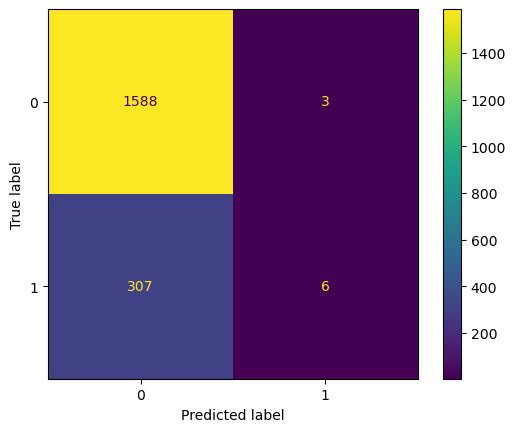

Accuracy :  0.8371848739495799
Precision:  0.8371848739495799
Recall   :  0.8371848739495799
F1 Score :  0.8371848739495799
AUC      :  0.8371848739495799
ROC AUC  :  0.8371848739495799
ROC Curve:  0.8371848739495799


In [18]:
model       = LogisticRegression(solver='liblinear').fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predictions     : ', predictions)
print('True Values     : ', y_test.values)
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()
print('Accuracy : ', model.score(X_test, y_test))
print('Precision: ', model.score(X_test, y_test))
print('Recall   : ', model.score(X_test, y_test))
print('F1 Score : ', model.score(X_test, y_test))
print('AUC      : ', model.score(X_test, y_test))
print('ROC AUC  : ', model.score(X_test, y_test))
print('ROC Curve: ', model.score(X_test, y_test))

The code `model.predict_proba(X_test)` returns the predicted probabilities for each class for every sample in the test set `X_test` using the trained logistic regression model. Instead of just predicting the most likely class label, this method provides the likelihood (as a value between 0 and 1) that each sample belongs to each possible class.

The output is a NumPy array with shape `(n_samples, n_classes)`, where each row corresponds to a sample and each column corresponds to a class. For binary classification, the first column typically represents the probability of class 0 and the second column the probability of class 1. These probabilities are useful for evaluating model confidence, plotting ROC curves, or making threshold-based decisions rather than always choosing the most likely class.

In [19]:
print('Model Predictions Probabilities:\n', model.predict_proba(X_test))

Model Predictions Probabilities:
 [[0.91041022 0.08958978]
 [0.89648471 0.10351529]
 [0.88444363 0.11555637]
 ...
 [0.81793554 0.18206446]
 [0.91537428 0.08462572]
 [0.87010572 0.12989428]]


## Accuracy
This code calculates and prints the accuracy of a classification model's predictions. \
The expression `(predictions == y_test)` creates a Boolean array where each element is `True` if the predicted label matches the actual label in `y_test`, and `False` otherwise. Taking the `.mean()` of this Boolean array converts `True` to 1 and `False` to 0, resulting in the proportion of correct predictions—this is the model's accuracy.

The second line uses the `print` function to display the calculated accuracy with a descriptive label. Accuracy is a common metric for evaluating classification models, representing the fraction of test samples that were correctly classified.

In [20]:
accuracy = (predictions == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8371848739495799


This line prints the mean accuracy of the trained model on the test dataset. The `model.score(X_test, y_test)` method calculates the proportion of correct predictions by comparing the model's predicted labels for `X_test` with the actual labels in `y_test`. Internally, it uses the `predict` method to generate predictions and then computes the accuracy as the fraction of matches. The result is a floating-point value between 0 and 1, representing the percentage of test samples that were classified correctly. The `print` function displays this value with the label `'Model Mean Accuracy:'`, providing a straightforward summary of the model's performance on unseen data.

In [21]:
print('Model Mean Accuracy:', model.score(X_test, y_test))

Model Mean Accuracy: 0.8371848739495799


This code calculates the four fundamental components of a confusion matrix for a binary classification problem:\
- true positives (tp)
- true negatives (tn)
- false positives (fp)
- false negatives (fn)

Each line creates a Boolean Series indicating which samples fall into each category.

- `tp` (true positives) identifies cases where the model predicted class 1 and the actual label is also 1. \
It uses a logical AND between `predictions == 1` and `y_test == 1`.
- `tn` (true negatives) finds cases where the model predicted class 0 and the actual label is 0.
- `fp` (false positives) marks cases where the model predicted class 1 but the actual label is 0.
- `fn` (false negatives) captures cases where the model predicted class 0 but the actual label is 1.

The use of `pd.Series` ensures the predictions are in a pandas Series format, and `.reset_index(drop=True)` aligns the indices of `y_test` with the predictions, which is important if the indices do not match after splitting the data. These Boolean Series can be summed to count the number of occurrences in each category, which is useful for calculating metrics like precision, recall, and F1 score.

In [22]:
tp = pd.Series(predictions == 1) & (y_test == 1).reset_index(drop=True)
tn = pd.Series(predictions == 0) & (y_test == 0).reset_index(drop=True)
fp = pd.Series(predictions == 1) & (y_test == 0).reset_index(drop=True)
fn = pd.Series(predictions == 0) & (y_test == 1).reset_index(drop=True)

This code prints the counts of each category in the confusion matrix for a binary classification problem. The variables `tp`, `tn`, `fp`, and `fn` are Boolean Series that indicate true positives, true negatives, false positives, and false negatives, respectively. By calling `.sum()` on each Series, the code counts the number of samples that fall into each category.

- `True Positives :` displays the number of cases where the model correctly predicted the positive class.
- `True Negatives :` shows the number of cases where the model correctly predicted the negative class.
- `False Positives:` gives the count of cases where the model incorrectly predicted the positive class (type I error).
- `False Negatives:` reports the number of cases where the model incorrectly predicted the negative class (type II error).

Printing these values helps you understand the types of errors your model is making and is essential for calculating other performance metrics like precision, recall, and F1 score.

In [23]:
print('True Positives :', tp.sum())
print('True Negatives :', tn.sum())
print('False Positives:', fp.sum())
print('False Negatives:', fn.sum())   

True Positives : 6
True Negatives : 1588
False Positives: 3
False Negatives: 307


This code creates a pandas DataFrame from the confusion matrix generated by comparing the true labels (`y_test`) with the predicted labels (`predictions`). The `confusion_matrix` function from scikit-learn returns a 2D NumPy array where each row represents the actual class and each column represents the predicted class. For binary classification, the resulting matrix is 2x2, showing the counts of true negatives, false positives, false negatives, and true positives. Wrapping this matrix with `pd.DataFrame` makes it easier to view and analyze in a tabular format, which is especially useful in Jupyter notebooks or Visual Studio Code's interactive window. This table helps you quickly assess how well the model is distinguishing between the classes and where it is making errors.

In [24]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,1588,3
1,307,6


This code extracts the individual counts for true negatives (tn), false positives (fp), false negatives (fn), and true positives (tp) from the confusion matrix produced by comparing the true labels (`y_test`) with the predicted labels (`predictions`). The `confusion_matrix` function returns a 2x2 NumPy array for binary classification, where each element represents the count of a specific outcome: true negatives in the top-left, false positives in the top-right, false negatives in the bottom-left, and true positives in the bottom-right.

The `.ravel()` method flattens this 2D array into a 1D array, making it easy to unpack the four values directly into the variables `tn`, `fp`, `fn`, and `tp`. The second line simply outputs these values, allowing you to quickly inspect the number of each type of prediction outcome. This breakdown is useful for calculating detailed performance metrics such as precision, recall, and F1 score, and for understanding the types of errors the model is making.

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print('Confusion Matrix - True Positives :', tp)
print('Confusion Matrix - True Negatives :', tn)
print('Confusion Matrix - False Positives:', fp)
print('Confusion Matrix - False Negatives:', fn)


Confusion Matrix - True Positives : 6
Confusion Matrix - True Negatives : 1588
Confusion Matrix - False Positives: 3
Confusion Matrix - False Negatives: 307


This code visualizes the confusion matrix for the model's predictions using scikit-learn's `ConfusionMatrixDisplay`. The `from_predictions` method takes the true labels (`y_test`) and the predicted labels (`predictions`) to compute the confusion matrix and then creates a plot displaying the counts of true positives, true negatives, false positives, and false negatives in a grid format. Calling `plt.show()` renders the plot, making it easy to visually assess the model's classification performance and quickly identify where the model is making correct or incorrect predictions. This graphical representation is especially helpful for interpreting results and communicating model performance.

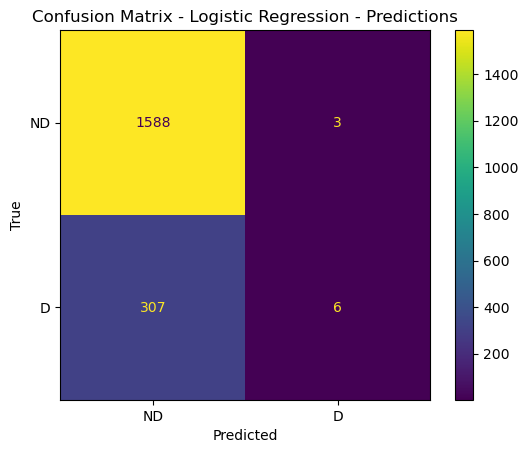

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.title('Confusion Matrix - Logistic Regression - Predictions')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.yticks([0, 1], ['No Default', 'Default'])
plt.gca().set_xticklabels(['ND', 'D'])
plt.gca().set_yticklabels(['ND', 'D'])
plt.show()

This code generates a visual representation of the confusion matrix for a trained classification model using scikit-learn's `ConfusionMatrixDisplay`. The `from_estimator` method takes the fitted model (`model`), the test feature set (`X_test`), and the true test labels (`y_test`). It uses the model to predict labels for `X_test` and then computes the confusion matrix by comparing these predictions to the actual labels. The resulting plot shows the counts of true positives, true negatives, false positives, and false negatives in a grid format. Calling `plt.show()` displays the plot, making it easy to interpret the model's classification performance at a glance. This visualization is useful for quickly identifying where the model is making correct and incorrect predictions.

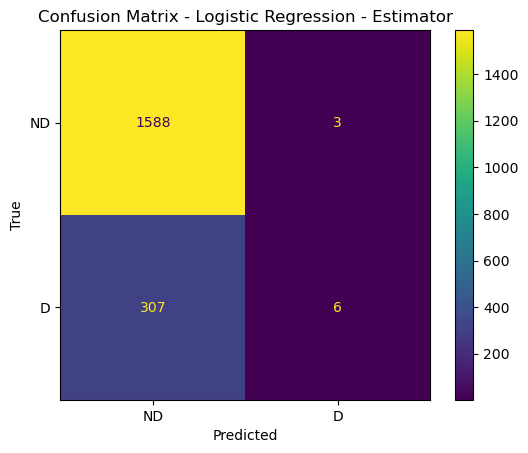

In [27]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix - Logistic Regression - Estimator')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.yticks([0, 1], ['No Default', 'Default'])
plt.gca().set_xticklabels(['ND', 'D'])
plt.gca().set_yticklabels(['ND', 'D'])
plt.show()

This code calculates three important evaluation metrics for a binary classification model: precision, recall, and F1 score. 

- **Precision** is computed as `tp / (tp + fp)`, where `tp` is the number of true positives and `fp` is the number of false positives. Precision measures the proportion of positive predictions that are actually correct, indicating how reliable the model's positive predictions are.
- **Recall** is calculated as `tp / (tp + fn)`, where `fn` is the number of false negatives. Recall measures the proportion of actual positives that the model correctly identified, reflecting the model's ability to find all relevant cases.
- **F1 score** is the harmonic mean of precision and recall, given by `2 * precision * recall / (precision + recall)`. The F1 score provides a single metric that balances both precision and recall, making it especially useful when you want to find an optimal trade-off between these two metrics.

The `print` statements then display the calculated values for precision, recall, and F1 score, helping you assess the model's performance beyond simple accuracy, especially in cases where class imbalance is a concern.

In [28]:
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1_score  = 2 * precision * recall / (precision + recall)
print('Precision: ',precision)
print('Recall   : ', recall)
print('F1 Score : ', f1_score)

Precision:  0.6666666666666666
Recall   :  0.019169329073482427
F1 Score :  0.037267080745341616
